# Python Project - Data Cleaning & Preprocessing

This project demonstrates essential data-cleaning techniques. The dataset will be processed through the following steps, including:

- Removing duplicate entries to ensure data integrity
- Handling outlier and missing values through imputation or removal
- Standardizing data formats for consistency across the dataset
- Transforming features to ensure the data is clean, suitable, and well-prepared for analysis or modeling (optional)

These steps help prepare the data for more accurate analysis and modeling.


## Outline
1. Import libraries
2. Load and read dataset
3. Clean dataset

   3-1. Remove duplicates
   
   3-2. Identify & handle outliers
   
   3-3. Address missing values

   3-4. Standardize data formats 
    
   3-5. Transform features (optional)
   
5. Save final dataset

## 1. Import Libraries

For the data preprocessing process, several libraries are required to manipulate and transform data to meet analysis needs.

- `NumPy`: This library is primarily used for performing **low-level** numerical computations and efficiently handling multi-dimensional arrays (1D arrays, 2D matrices, 3D tensors, etc.).
- `Pandas`: This library is built on top of `NumPy`. It provides **higher-level** data structures, such as Series (labeled 1D arrays) and DataFrames (labeled 2D tables), along with powerful tools for data manipulation, cleaning, and analysis, making it more intuitive for working with structured data.
- `Matplotlib`: For creating static, interactive, and animated visualizations in Python, particularly useful for plotting graphs like histograms, line charts, and scatter plots.
- `Seaborn`: A statistical data visualization library built on top of Matplotlib, offering more complex and aesthetically pleasing plots for data exploration.
- `SciPy`: Provides functionality for scientific computing, including statistical tests (e.g., Shapiro-Wilk test, Kolmogorov-Smirnov test) and optimizations.
- `Counter`: A simple tool to count the occurrences of elements in a collection, particularly useful for frequency analysis in datasets.
- `re`: A library for working with regular expressions, enabling pattern matching, text parsing, and string manipulation.


In [1]:
import pandas as pd # Data manipulation and analysis
import numpy as np # Numerical computing
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical data visualization
import scipy.stats as stats  # Statistical tests and optimizations
from scipy.stats import shapiro, kstest  # Specific statistical tests
from collections import Counter  # Counting occurrences 
import re  # Regular expressions 

## 2. Load and Read Dataset

Once we import the necessary libraries, we can now load the dataset (`df_arabica_clean.csv`, a CSV file from [Kaggle](https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi)) into a Pandas DataFrame using `read_csv()` to make it easier to work with. 

In [2]:
df = pd.read_csv("df_arabica_clean.csv")

### 2-1. View General Information about the DataFrame

Before diving into any analysis, it's essential to understand the dataset first. In addition to reading the Kaggle dataset description, it's crucial to inspect the dataset using the `info()` function. This function provides a comprehensive overview of the dataset, giving us insights into its structure, data types, and any missing values, which are vital for preparing the data before conducting any analysis. 

Please note, if we only want to quickly check the size (dimensions) of the dataset, we can use `shape()`. This provides a concise way to get the number of rows and columns without all the additional details.

In [3]:
df.info()  # Shows column names, non-null counts, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

Overall, we can see that there are 207 rows with 41 columns, with the following distribution of data types:

- 13 floating point variables
- 6 integer variables
- 22 categorical variables

We can easily see that there are a few columns with missing data:
- `Farm Name`: 2 missing values
- `Lot Number`: 1 missing value
- `Mill`: 3 missing values
- `ICO Number`: 132 missing values (significantly more than others; likely an optional field for some entries)
- `Variety`: 6 missing values
- `Processing Method`: 5 missing values

Since the `ICO Number` has significantly large missing values, I looked into the missing ICO numbers to ensure it wouldn't affect the analysis. It seems lots of coffee beans do not have the ICO numbers. Usually, coffee beans that are commercial grade (commodity coffee) are more likely to follow the ICO regulations. 

Here are some reasons that beans might not have ICO numbers: 
- Specialty coffee sold through direct trade (e.g., farm-to-roaster relationships)
- Micro-lots and experimental coffee that bypass large commodity markets
- Coffee consumed within the producing country (not exported)

When studying **coffee quality and sustainability**, missing ICO numbers may not be a significant issue in the dataset, as these factors often relate to the coffee’s trade and market structure rather than its quality.

### 2-2. Quick Preview of Data 

We can also use `head()` to get a glimpse of the data, allowing us to check for any obvious issues or anomalies. Similarly, `tail()` can be used to inspect the last few rows and verify its consistency.

In [4]:
df.head() # Displays the first 5 rows of the DataFrame for a quick preview

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [5]:
df.tail() # Displays the last 5 rows of the DataFrame for a quick preview; to check consistensy

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
202,202,202,Brazil,Fazenda Conquista,019/22,Dry Mill,NaN,Ipanema Coffees,950,Sul de Minas,...,80.08,11.4,0,0,green,4,"February 2nd, 2024",Brazil Specialty Coffee Association,"Rua Gaspar Batista Paiva, 416 – Santa Luiza Va...",Chris Allen - 55 35 3212-4705
203,203,203,Nicaragua,Finca San Felipe,017-053-0155,Beneficio Atlantic Sébaco,017-053-0155,Exportadora Atlantic S.A,1200,Matagalpa,...,80.00,10.4,0,2,green,12,"March 2nd, 2024",Asociación de Cafés Especiales de Nicaragua,"Del Hotel Seminole 2 C al lago, 1 C arriba.",Maria Ines Benavidez Toval - 011-(505)-8396 4717
204,204,204,Laos,-,105/3/VL7285-005,DRY MILL,105/3/VL7285-005,Marubeni Corporation,1300,Bolaven Plateau,...,79.67,11.6,0,9,green,11,"November 11th, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
205,205,205,El Salvador,"Rosario de Maria II, Area de La Pila",0423A01,"Optimum Coffee, San Salvador, El Salvador",NaN,Aprentium Enterprises LLC,1200,"Volcan de San Vicente, La Paz, El Salvador",...,78.08,11.0,0,12,bluish-green,13,"March 7th, 2024",Salvadoran Coffee Council,"Final 1a. Av. Norte y 13 Calle Pte., dentro de...",Tomas Bonilla - (503) 2505-6600
206,206,206,Brazil,Walter Matter,1058 y 1059,Beneficio humedo/seco,002/1208/1016,Descafeinadores Mexicano SA. de CV,850-1100,Minas Gerais,...,78.00,11.3,0,0,green,1,"November 18th, 2023",Centro Agroecológico del Café A.C.,"Instituto de Ecología A. C., Campus III Edific...",Stephany Escamilla Femat - Tel. +52 228 842180...


After reviewing both results above, no discrepancies or inconsistencies were identified, indicating the data appears fairly consistent.

### 2-3. Explore Summary Statistics for Numerical and Categorical Columns

In addition to understanding the structure and completeness of the data, it’s important to explore the distribution and characteristics of the data values as well. We can achieve this using the following functions:

- `describe()`: Displays summary statistics for **numerical** columns, inclduing count, mean, standard deviation, min, max, etc.
- `describe(include='object')`: Provides summary statistics for **categorical** columns, inclduing count, unique values, the most frequent value (top), and its frequency

In [6]:
df.describe()  # Summary statistics for numerical columns

,Unnamed: 0,ID,Number of Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.00000,207.000000,207.000000,207.000000,207.0,207.0,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000
mean,103.000000,103.000000,155.449275,7.721063,7.744734,7.599758,7.69029,7.640918,7.644058,9.990338,10.0,10.0,7.676812,0.0,83.706570,10.735266,0.135266,0.690821,2.251208
std,59.899917,59.899917,244.484868,0.287626,0.279613,0.275911,0.25951,0.233499,0.256299,0.103306,0.0,0.0,0.306359,0.0,1.730417,1.247468,0.592070,1.686918,2.950183
min,0.000000,0.000000,1.000000,6.500000,6.750000,6.670000,6.83000,6.830000,6.670000,8.670000,10.0,10.0,6.670000,0.0,78.000000,0.000000,0.000000,0.000000,0.000000
25%,51.500000,51.500000,1.000000,7.580000,7.580000,7.420000,7.50000,7.500000,7.500000,10.000000,10.0,10.0,7.500000,0.0,82.580000,10.100000,0.000000,0.000000,0.000000
50%,103.000000,103.000000,14.000000,7.670000,7.750000,7.580000,7.67000,7.670000,7.670000,10.000000,10.0,10.0,7.670000,0.0,83.750000,10.800000,0.000000,0.000000,1.000000
75%,154.500000,154.500000,275.000000,7.920000,7.920000,7.750000,7.87500,7.750000,7.790000,10.000000,10.0,10.0,7.920000,0.0,84.830000,11.500000,0.000000,1.000000,3.000000
max,206.000000,206.000000,2240.000000,8.580000,8.500000,8.420000,8.58000,8.250000,8.420000,10.000000,10.0,10.0,8.580000,0.0,89.330000,13.500000,5.000000,12.000000,16.000000


For numerical variables, we typically examine central tendency, spread & dispersion, outliers, and missing data.


Here are some key findings of the numerical data: 
- `Number of Bags`: Has a large range (1 to 2240) and high standard deviation (~244.5), indicating extreme variations. We should check for potential outliers.
- `Aroma`, `Flavor`, `Aftertaste`, `Acidity`, `Body`, `Balance`, `Uniformity`: Mostly around 7.6–7.7, with low standard deviations (0.1–0.3). No immediate concerns, but we should confirm there are no unexpected outliers.
- `Clean Cup`, `Sweetness`, and `Defects`: Consistently scored 10 (`Clean Cup` & `Sweetness`) or 0 (`Defects`), suggesting no variation. We should verify whether these are meaningful variables or redundant.
- `Total Cup Points`: Ranges from 78 to 89, with a mean of ~83.7. No major inconsistencies, but outliers should still be checked.
- `Moisture Percentage`: Ranges from 0% to 13.5%, with a mean of 10.7%, showing that most of the beans fall within the ideal moisture content range (10–12%). Check if 0% values are errors or missing values recorded as zero.
- Defects (`Category One Defects`, `Category Two Defects`): `Category Two Defects` appear more frequently than `Category One Defects`. Need to check for missing values and verify data distribution.
- `Quakers`: Most coffee batches have 0 quakers, but a few have up to 12, suggesting possible outliers. The data seems skewed, so further checks may be needed.


In [7]:
df.describe(include='object').iloc[:, :20]  # Summary for categorical columns

,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Bag Weight,In-Country Partner,Harvest Year,Grading Date,Owner,Variety,Status,Processing Method,Color,Expiration,Certification Body
count,207,205,206,204,75,207,206,205,206,207,207,207,207,207,201,207,202,207,207,207
unique,22,172,187,162,67,72,97,120,172,39,21,7,75,80,48,1,10,12,75,21
top,Taiwan,Doi Tung Development Project,1,Dry Mill,non,Taiwan Coffee Laboratory,1200,Chiayi,Doi Tung Development Project,30 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,Completed,Washed / Wet,green,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室
freq,61,7,11,11,5,51,23,12,7,39,83,99,40,30,27,207,124,101,40,83


In [8]:
df.describe(include='object').iloc[:, 20:30]  # Summary for categorical columns

,Certification Address,Certification Contact
count,207,207
unique,21,21
top,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
freq,83,83


After careful review, I believe the following categorical variables may provide useful insights into the dataset:

- `Country of Origin`: The dataset includes 22 countries, with "Taiwan" being the most frequent (66 out of 207, a relatively large proportion). We could analyze the distribution on a map for better visualization or focus on a subset of countries or group them by region. This approach could help simplify the analysis and communicate insights more effectively without overwhelming the viewer.
- `Bag Weight`: There are 39 unique values for bag weight, and "30 kg" is the most frequent (66 out of 207, relatively frequent). This would be useful to examine further later on during EDA. Converting it to a numerical variable could also improve analysis.
- `Harvest Year`: There are 7 unique years, with "2021/2022" having the highest frequency (99 out of 207, relatively large). Worth checking for trends or seasonality.
- `Grading Date` & `Expiration`: Both variables have 75 unique values with the same top frequency (40 out of 207). It seems that the `Expiration date` is consistently one year after the `Grading date`. This could be worth verifying to ensure consistency.
- `Variety`: With 48 unique values, Gesha has the highest frequency. It might be helpful to check for consistency in category names, as there may be variations or typos.
- `Processing Method`: There are 10 unique values, and "Washed/Wet" is the most frequent (124 out of 207, a relatively large proportion). It’s worth checking to ensure the categories are properly defined and consistent.
- `Color`: There are 12 unique values, with green being the most frequent (101 out of 207, a relatively large proportion). This might warrant further exploration to check for consistency or unusual entries.
- `Company`, `In-Country Partner`, `Owner`, `Certification Body`: It may be beneficial to check the names for consistency. Additionally, both `In-Country Partner` and `Certification Body` have the same number of unique values and top frequencies, suggesting potential overlap or redundancy.

Minor notes:
- `Status`: Consistently labeled "Completed". We should verify whether these are meaningful variables or redundant.
- `Certification Address` and `Certification Contact`: These fields may not be necessary, and we should consider removing them after review.

Here’s a summary of the key steps to take after removing duplicates:

1. Handle Outliers: Investigate outliers in variables like `Number of Bags`, `Moisture Percentage`, and `Quakers`
2. Verify No-Variation Variables: Decide whether to keep or remove variables like `Clean Cup`, `Sweetness`, `Defects`, and `Status` that show no variation
3. Check for Missing Data: Address any missing or incorrect values, especially in fields like `Moisture Percentage`
4. Standardize Categorical Data: Ensure consistency in categorical variables such as `Variety`, `Processing Method`, and `Company`
5. Validate Dates: Ensure `Grading Date` and `Expiration` follow a consistent pattern
6. Group Categorical Data: Consider grouping categorical variables with too many unique values to simplify the analysis

## 3. Clean Dataset 

In this section, we will go through the following steps to clean and prepare the dataset for analysis:
- Remove Duplicates: Identify and eliminate duplicate rows to ensure unique and accurate records
- Handle Outliers: Detect and address outliers to prevent them from distorting analysis and model performance with skewed data
- Address Missing Values: Impute missing values using appropriate statistical methods or remove records if necessary
- Transform Features: Normalize, scale, or encode features to improve interpretability and prepare data for analysis or modeling


### 3-1. Remove Duplicates

After better understanding the dataset, we can move forward to identifying duplicate rows using `duplicated()` function. We usually handle duplicates first then null since duplicates may skew the data. Removing duplicates can help handle nulls more effectively using distinct values. 

In [9]:
duplicate_rows = df.duplicated() # Check for exact duplicate rows
print("Number of duplicate rows:", duplicate_rows.sum())

duplicates = df[duplicate_rows] # Find and view duplicate rows 
print("Duplicate rows:", duplicates)

duplicates_by_column = df[df.duplicated(subset=['ID'])] # Count and handle duplicates in specific columns
print("Number of duplicate rows based on 'ID':", duplicates_by_column.shape[0])

Number of duplicate rows: 0
Duplicate rows: Empty DataFrame
Columns: [Unnamed: 0, ID, Country of Origin, Farm Name, Lot Number, Mill, ICO Number, Company, Altitude, Region, Producer, Number of Bags, Bag Weight, In-Country Partner, Harvest Year, Grading Date, Owner, Variety, Status, Processing Method, Aroma, Flavor, Aftertaste, Acidity, Body, Balance, Uniformity, Clean Cup, Sweetness, Overall, Defects, Total Cup Points, Moisture Percentage, Category One Defects, Quakers, Color, Category Two Defects, Expiration, Certification Body, Certification Address, Certification Contact]
Index: []

[0 rows x 41 columns]
Number of duplicate rows based on 'ID': 0


There are no duplicate rows in the dataset. However, to ensure data integrity, we can use the `drop_duplicates()` function in Pandas, which is the primary method for removing duplicates. If needed, we can specify columns to check for duplicates rather than considering entire rows using `drop_duplicates(subset=['Column1', 'Column2'])`. This helps maintain a clean dataset while preventing unintended duplications in the analysis.

In [10]:
df_drop_duplicates = df.drop_duplicates()

print("Original shape:", df.shape)
print("After dropping duplicate rows:", df_drop_duplicates.shape)

Original shape: (207, 41)
After dropping duplicate rows: (207, 41)


Other than duplicate rows, we should also avoid any duplicate columns. The column `Unnamed: 0` doesn't seem to contain meaningful data and is typically created when reading a CSV file with an index or when there's an extra index column in the data. It's better to remove it to clean up the dataset using `drop()`.

In [11]:
df_drop_duplicates = df_drop_duplicates.drop(columns=['Unnamed: 0'])

print("Original shape:", df.shape)
print("After dropping duplicate rows:", df_drop_duplicates.shape)

Original shape: (207, 41)
After dropping duplicate rows: (207, 40)


In [12]:
df_duplicates_dropped = df_drop_duplicates

### 3-2. Identify & Handle Outliers

Based on the summary statistics from section 2-3, we should look into outliers in variables `Number of Bags`, `Moisture Percentage`, and `Quakers` using the interquartile range (IQR) method. 

In [13]:
df_handle_outliers = df_duplicates_dropped

#### 3-2-1. Investigate `Number of Bags`

In [14]:
Q1 = df_handle_outliers['Number of Bags'].quantile(0.25)
Q3 = df_handle_outliers['Number of Bags'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_numOfBag = df_handle_outliers[(df_handle_outliers['Number of Bags'] < lower_bound) | 
                                    (df_handle_outliers['Number of Bags'] > upper_bound)]
print("Number of outliers:", outliers_numOfBag.shape[0])
print(outliers_numOfBag[['ID', 'Number of Bags']])

Number of outliers: 2
      ID  Number of Bags
129  129             960
202  202            2240


There are two outliers in the `Number of Bags` column with values of 960 and 2240, which are significantly higher than the typical range observed in the dataset. Given that these outliers represent only 2 instances out of a total of 204 samples, and considering their potential to distort the analysis, I have decided to remove them to ensure more accurate and representative results.

In [15]:
# Drop the outliers
df_handle_outliers = df_handle_outliers[~df_handle_outliers.index.isin(outliers_numOfBag.index)]

# Verify the shape of the DataFrame after dropping
print("After dropping outlier rows:", df_handle_outliers.shape)

After dropping outlier rows: (205, 40)


#### 3-2-2. Investigate `Moisture Percentage`

In [16]:
Q1 = df_handle_outliers['Moisture Percentage'].quantile(0.25)
Q3 = df_handle_outliers['Moisture Percentage'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_moistPct = df_handle_outliers[(df_handle_outliers['Moisture Percentage'] < lower_bound) | 
                                            (df_handle_outliers['Moisture Percentage'] > upper_bound)]
print("Number of outliers:", outliers_moistPct.shape[0])
print(outliers_moistPct[['ID', 'Moisture Percentage']])

Number of outliers: 1
      ID  Moisture Percentage
125  125                  0.0


Given the small dataset (207 rows), outright removal could lead to unnecessary data loss. A better approach may be to replace it with a reasonable value, such as:

- **Mean** Moisture Percentage: The mean is a good choice if the data follows a normal distribution (bell-shaped). It retains the overall balance of the dataset
- **Median** Moisture Percentage: The median is better when the data is skewed (e.g., right-skewed or left-skewed). It is robust to outliers, meaning extreme values won’t impact it much. This is usually the safest choice if the data isn’t normally distributed
- **Mode** (Most Frequent Value): The mode is useful if Moisture Percentage has repeated values (e.g., most samples have the same moisture level). It’s good for categorical-like distributions but less common for continuous data

Since this seems like an error rather than a natural outlier, replacing it with a reasonable estimate would maintain data integrity while avoiding distortions. We will first check the normality of the data here using the following visualization methods and statistical tests:

- Visual methods (Histogram, Boxplot, QQ Plot) help spot skewness and outliers quickly
- Statistical tests (Shapiro-Wilk for smaller dataset, Kolmogorov-Smirnov for larger ones) provide formal evidence for normality

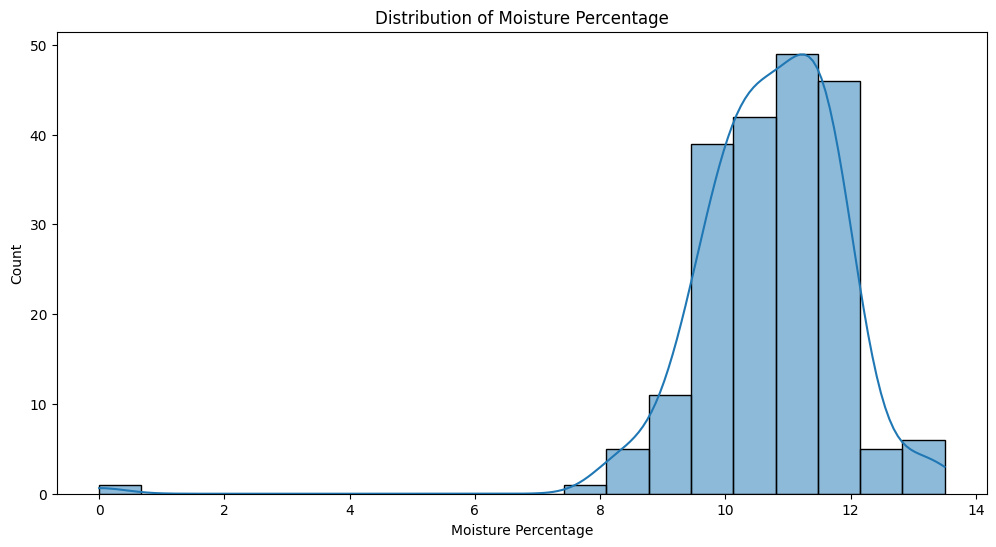

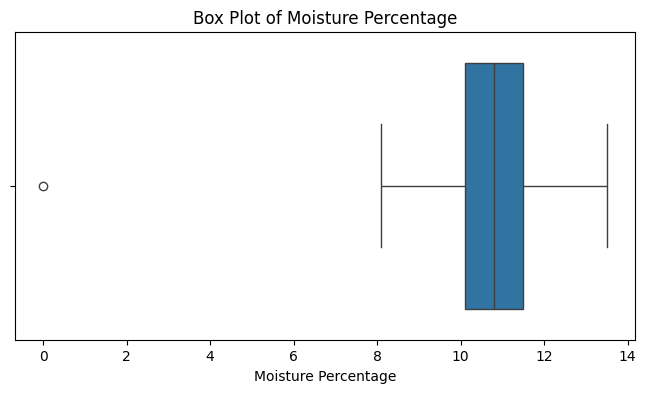

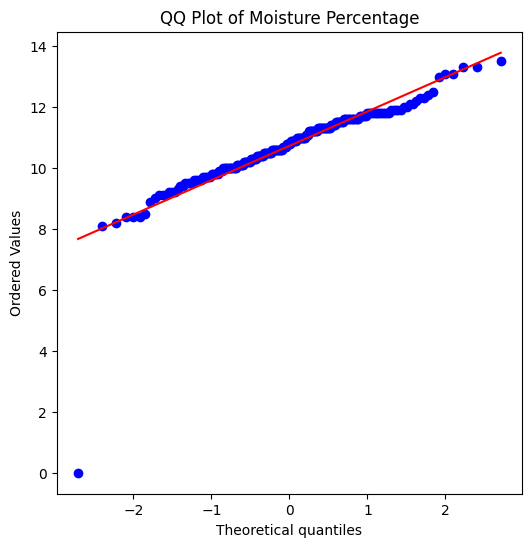

Shapiro-Wilk Test: p-value = 0.00000


In [17]:
# Histogram & KDE Plot
plt.figure(figsize=(12, 6))
sns.histplot(df_handle_outliers['Moisture Percentage'], kde=True, bins=20)
plt.title('Distribution of Moisture Percentage')
plt.show()

# Box Plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_handle_outliers['Moisture Percentage'])
plt.title('Box Plot of Moisture Percentage')
plt.show()

# QQ Plot
plt.figure(figsize=(6, 6))
stats.probplot(df_handle_outliers['Moisture Percentage'], dist="norm", plot=plt)
plt.title('QQ Plot of Moisture Percentage')
plt.show()

# Shapiro-Wilk Test (Good for small datasets)
shapiro_stat, shapiro_p = shapiro(df_handle_outliers['Moisture Percentage'])
print(f'Shapiro-Wilk Test: p-value = {shapiro_p:.5f}')

# Kolmogorov-Smirnov Test (For larger dataset)
# ks_stat, ks_p = kstest(df_handle_outliers['Moisture Percentage'], 'norm')
# print(f'Kolmogorov-Smirnov Test: p-value = {ks_p:.5f}')

The histogram forms a bell-shaped curve and the QQ plot aligns with the diagonal, the data is likely normal. Also, the boxplot is symmetrical with few outliers, it supports the normality hypothesis. For the statistical testing using Shapiro-Wilk test, p-value is ≤ 0.05, it rejects normality (data is likely not normal).

There is a conflict between visual inspections and the statistical test. We will use the **median** to be on the safe side. Since the normality test failed, this suggests potential mild skewness or outliers, and median is less affected by these issues.

In [18]:
median_value = df_handle_outliers['Moisture Percentage'].median()
df_handle_outliers.loc[:, 'Moisture Percentage'] = df_handle_outliers['Moisture Percentage'].replace(0.0, median_value)

# Double check if the outlier is modified
Q1 = df_handle_outliers['Moisture Percentage'].quantile(0.25)
Q3 = df_handle_outliers['Moisture Percentage'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_moistPct = df_handle_outliers[(df_handle_outliers['Moisture Percentage'] < lower_bound) | 
                                            (df_handle_outliers['Moisture Percentage'] > upper_bound)]
print("Number of outliers:", outliers_moistPct.shape[0])
print(outliers_moistPct[['ID', 'Moisture Percentage']])

print("Total rows:", df_handle_outliers.shape[0])

Number of outliers: 0
Empty DataFrame
Columns: [ID, Moisture Percentage]
Index: []
Total rows: 205


#### 3-2-3. Investigate `Quakers`

In [19]:
Q1 = df_handle_outliers['Quakers'].quantile(0.25)
Q3 = df_handle_outliers['Quakers'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_quakers = df_handle_outliers[(df_handle_outliers['Quakers'] < lower_bound) | 
                                    (df_handle_outliers['Quakers'] > upper_bound)]
print("Number of outliers:", outliers_quakers.shape[0])
print(outliers_quakers[['ID', 'Quakers']])

Number of outliers: 16
      ID  Quakers
13    13        3
34    34        3
48    48        3
51    51        3
60    60        3
76    76        5
83    83        3
101  101        5
102  102        3
165  165        7
195  195        8
198  198        3
199  199        6
200  200       10
204  204        9
205  205       12


We identified several outliers in the `Quakers` feature, with values ranging from 3 to 12. These values are notably higher than the typical range and could represent either data errors or legitimate extreme cases. Instead of removing these outliers immediately, we will flag them for further review during the EDA stage (similar to `Number of Bags`). This will allow us to better understand their context and impact, and make an informed decision on whether they should be excluded, adjusted, or kept as-is for further analysis.

In [20]:
# Flag outliers
df_handle_outliers = df_handle_outliers.copy()  # Make sure it's a copy of the DataFrame
df_handle_outliers.loc[:, 'Outlier_Flag_Quakers'] = df_handle_outliers['Quakers'].apply(
    lambda x: True if x < lower_bound or x > upper_bound else False)

# Inspect flagged rows
print("Total rows:", df_handle_outliers.shape[0])
print("Number of outliers:", outliers_quakers.shape[0])
print(df_handle_outliers[['ID', 'Quakers', 'Outlier_Flag_Quakers']])

Total rows: 205
Number of outliers: 16
      ID  Quakers  Outlier_Flag_Quakers
0      0        0                 False
1      1        0                 False
2      2        0                 False
3      3        0                 False
4      4        2                 False
..   ...      ...                   ...
201  201        1                 False
203  203        2                 False
204  204        9                  True
205  205       12                  True
206  206        0                 False

[205 rows x 3 columns]


In [21]:
df_outliers_handled = df_handle_outliers

### 3-3. Address Missing Values

Once duplicates are confirmed as handled, we can identify missing values using the `isnull()` function. Missing values are addressed after duplicates to prevent skewing the data. Depending on the context, we can either remove rows with missing values or impute them—using the median for numerical columns and the mode for categorical ones. This ensures the dataset is ready for the next step: standardizing formats.

In [22]:
df_adjust_missing = df_outliers_handled

In [23]:
null_counts = df_adjust_missing.isnull().sum() # Count missing values per column
# print(null_counts)

null_col_counts = null_counts[null_counts > 0] # Columns with missing values (+ counts)
print(null_col_counts)
print("# of variables that has missing values: ", null_col_counts.count())

Farm Name              2
Lot Number             1
Mill                   3
ICO Number           130
Altitude               1
Region                 2
Producer               1
Variety                6
Processing Method      5
dtype: int64
# of variables that has missing values:  9


In [24]:
data_null_cols = (null_col_counts/ len(df_adjust_missing)) * 100 # Missing ratio per column
data_null_cols = data_null_cols.sort_values(ascending=False)

missing_data = pd.DataFrame({'Missing Ratio (%)' : data_null_cols.round(2)})
missing_data.head(null_col_counts.count()) 

,Missing Ratio (%)
ICO Number,63.41
Variety,2.93
Processing Method,2.44
Mill,1.46
Farm Name,0.98
Region,0.98
Lot Number,0.49
Altitude,0.49
Producer,0.49


All missing values in this dataset are in categorical variables. As noted in Section 2-1, we don’t need to adjust the `ICO Number`. For the other columns with moderate to low missing ratios (2.9% and lower), imputing missing values with the mode (most frequent value) for each categorical variable is a reasonable and effective approach. Given that many of these columns have very low missing ratios (<1%), this imputation should not significantly impact the analysis.

In [25]:
missing_ids_variety = df_adjust_missing.loc[df_adjust_missing['Variety'].isna(), 'ID'].tolist()
missing_ids_proc = df_adjust_missing.loc[df_adjust_missing['Processing Method'].isna(), 'ID'].tolist()
missing_ids_mill = df_adjust_missing.loc[df_adjust_missing['Mill'].isna(), 'ID'].tolist()
missing_ids_farm = df_adjust_missing.loc[df_adjust_missing['Farm Name'].isna(), 'ID'].tolist()
missing_ids_region = df_adjust_missing.loc[df_adjust_missing['Region'].isna(), 'ID'].tolist()
missing_ids_lotnum = df_adjust_missing.loc[df_adjust_missing['Lot Number'].isna(), 'ID'].tolist()
missing_ids_alti = df_adjust_missing.loc[df_adjust_missing['Altitude'].isna(), 'ID'].tolist()
missing_ids_prod = df_adjust_missing.loc[df_adjust_missing['Producer'].isna(), 'ID'].tolist()

# Combine all lists into one
all_ids = (missing_ids_variety + missing_ids_proc + missing_ids_mill + 
missing_ids_farm + missing_ids_region + missing_ids_lotnum + 
missing_ids_alti + missing_ids_prod)

# Count occurrences
# from collections import Counter
id_counts = Counter(all_ids)

# Convert to DataFrame
df_missing_id = pd.DataFrame(list(id_counts.items()), columns=['ID', 'Count'])
print(df_missing_id)

     ID  Count
0    25      1
1    97      2
2   105      8
3   177      1
4   178      1
5   194      1
6    23      1
7    44      1
8    51      1
9   143      1
10   74      1
11   98      1
12  196      1


We have identified that `ID` #105 has 8 missing values across categorical variables, which is significant enough to warrant removal. Therefore, this row will be excluded from the dataset. For the remaining rows with missing values in categorical variables, the missing values will be replaced with the mode. This approach ensures minimal impact on the analysis, as the missing ratios for these variables are relatively low, and using the mode preserves the general distribution of the data without introducing significant bias.

In [26]:
df_adjust_missing = df_adjust_missing[df_adjust_missing['ID'] != 105]
print(df_adjust_missing.shape)

(204, 41)


In [27]:
df_adjust_missing.loc[:, 'Variety'] = df_adjust_missing['Variety'].fillna(df['Variety'].mode()[0])
df_adjust_missing.loc[:, 'Processing Method'] = df_adjust_missing['Processing Method'].fillna(df['Processing Method'].mode()[0])
df_adjust_missing.loc[:, 'Mill'] = df_adjust_missing['Mill'].fillna(df['Mill'].mode()[0])
df_adjust_missing.loc[:, 'Farm Name'] = df_adjust_missing['Farm Name'].fillna(df['Farm Name'].mode()[0])
df_adjust_missing.loc[:, 'Region'] = df_adjust_missing['Region'].fillna(df['Region'].mode()[0])
df_adjust_missing.loc[:, 'Lot Number'] = df_adjust_missing['Lot Number'].fillna(df['Lot Number'].mode()[0])
df_adjust_missing.loc[:, 'Altitude'] = df_adjust_missing['Altitude'].fillna(df['Altitude'].mode()[0])
df_adjust_missing.loc[:, 'Producer'] = df_adjust_missing['Producer'].fillna(df['Producer'].mode()[0])

In [28]:
# Double check if everything is modified
missing_ids_variety = df_adjust_missing.loc[df_adjust_missing['Variety'].isna(), 'ID'].tolist()
missing_ids_proc = df_adjust_missing.loc[df_adjust_missing['Processing Method'].isna(), 'ID'].tolist()
missing_ids_mill = df_adjust_missing.loc[df_adjust_missing['Mill'].isna(), 'ID'].tolist()
missing_ids_farm = df_adjust_missing.loc[df_adjust_missing['Farm Name'].isna(), 'ID'].tolist()
missing_ids_region = df_adjust_missing.loc[df_adjust_missing['Region'].isna(), 'ID'].tolist()
missing_ids_lotnum = df_adjust_missing.loc[df_adjust_missing['Lot Number'].isna(), 'ID'].tolist()
missing_ids_alti = df_adjust_missing.loc[df_adjust_missing['Altitude'].isna(), 'ID'].tolist()
missing_ids_prod = df_adjust_missing.loc[df_adjust_missing['Producer'].isna(), 'ID'].tolist()

# Combine all lists into one
all_ids = (missing_ids_variety + missing_ids_proc + missing_ids_mill + 
missing_ids_farm + missing_ids_region + missing_ids_lotnum + 
missing_ids_alti + missing_ids_prod)

# Count occurrences
id_counts = Counter(all_ids)

# Convert to DataFrame
df_missing_id = pd.DataFrame(list(id_counts.items()), columns=['ID', 'Count'])
print(df_missing_id)

Empty DataFrame
Columns: [ID, Count]
Index: []


Once the updates are checked, we can save the data frame as `df_missing_adjusted`.

In [29]:
df_missing_adjusted = df_adjust_missing

### 3-4. Standardize Data Formats

To ensure consistency across the dataset, we standardize data formats for better analysis, visualization, and modeling. Key areas to address:

- Removing Inconsistent Symbols/Spaces: Cleaning extra spaces, fixing typos, and replacing special characters if needed to maintain data integrity
- Consistent Categorical Labels: Standardizing spelling, capitalization, and formats for categorical variables like `Country of Origin`, `Region`, `Variety`, `Processing Method`, `Mill`, `Color`, `Harvest Year`, `Company`, `In-Country Partner`, `Owner`, `Certification Body`
- Numeric Format Standardization: Ensuring numeric fields maintain consistent decimal places or units. Although no major issues have been identified so far, the `Altitude` and `Bag Weight` variables are currently treated as categorical, but it might be more appropriate as a numerical variable. This requires further investigation
- Date Standardization: Converting date fields like `Grading Date` and `Expiration` to a uniform format (e.g., YYYY-MM-DD) for consistency in time-based analysis



We will mainly address the four key areas mentioned above and then perform a quick final check for consistency across all categorical and numerical variables.

#### 3-4-1. Column Names

In [30]:
df_formatting = df_missing_adjusted

In [31]:
# Print the actual column names in the DataFrame
print(df_formatting.columns)
# df_formatting.columns = df_formatting.columns.str.strip()  # Remove leading/trailing spaces if needed
# df_formatting.columns = df_formatting.columns.str.title()  # Convert to title case if needed

Index(['ID', 'Country of Origin', 'Farm Name', 'Lot Number', 'Mill',
       'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact',
       'Outlier_Flag_Quakers'],
      dtype='object')


Everything looks good, so we are ready to move forward with checking and standardizing the labels and values.

#### 3-4-2. Categorical & Numerical Labels



In [32]:
# Inspect unique values in categorical columns
categorical_columns = ['Country of Origin', 'Region', 'Variety', 'Processing Method']
for col in categorical_columns:
    if col in df_formatting.columns:  # Check if column exists
        print("Unique values in", col, ":")
        print(df_formatting[col].unique())
        print()
    else:
        print(col, "column is not present in the DataFrame.")


Unique values in Country of Origin :
['Colombia' 'Taiwan' 'Laos' 'Costa Rica' 'Guatemala'
 'Tanzania, United Republic Of' 'Ethiopia' 'Thailand' 'Brazil'
 'United States (Hawaii)' 'Kenya' 'Uganda' 'Indonesia' 'Peru' 'Panama'
 'Nicaragua' 'Vietnam' 'Honduras' 'El Salvador' 'Madagascar' 'Mexico'
 'Myanmar']

Unique values in Region :
['Piendamo,Cauca' 'Chiayi' 'Laos Borofen Plateau' 'Los Santos,Tarrazu'
 'Popayan,Cauca' 'Chimaltenango' 'KILIMANJARO' 'Guji' 'Acatenango'
 'Yunlin' 'tolima' 'Gedeb,Yirgacheffe,Sidamo'
 'Shibi, Gukeng Township, Yunlin County 郵遞區號 , Taiwan (R.O.C.)'
 'Gukeng Township, Yunlin County' 'Arusha'
 'Guatemala, Fraijanes, Santa Rosa' '卓溪鄉Zhuoxi Township' 'Chiang Mai'
 'Quindio' 'Região Vulcânica' 'Kona' '壽豐鄉Shoufeng Township'
 'Dongshan Dist., Tainan City' 'Oromia' 'Southern Ethiopia Guji' 'OROMIA'
 'Central' 'Caoling , Gukeng Township, Yunlin County'
 '秀林鄉Show Linxia Township' '台灣屏東' '苗栗縣' 'Rwenzori' 'Antigua' 'Santa Rosa'
 'quiche' '新竹縣' 'Aceh Tengah' 'Villa Rica' '

- `Country`

    For better data consistency and readability, I will make the following updates:

    -  Update "Tanzania, United Republic Of" to "Tanzania"
    -  Shorten "United States (Hawaii)" to "United States"

In [33]:
df_formatting.loc[:, 'Country of Origin'] = df_formatting['Country of Origin'].replace({
    'Tanzania, United Republic Of': 'Tanzania',
    'United States (Hawaii)': 'United States'
})

print(df_formatting['Country of Origin'].unique())   # Check unique values to confirm updates
df_formatting['Country of Origin'].value_counts()    # Check distribution

['Colombia' 'Taiwan' 'Laos' 'Costa Rica' 'Guatemala' 'Tanzania' 'Ethiopia'
 'Thailand' 'Brazil' 'United States' 'Kenya' 'Uganda' 'Indonesia' 'Peru'
 'Panama' 'Nicaragua' 'Vietnam' 'Honduras' 'El Salvador' 'Madagascar'
 'Mexico' 'Myanmar']


Country of Origin
Taiwan           61
Guatemala        21
Colombia         18
Honduras         13
Thailand         12
Ethiopia         11
Costa Rica        8
Brazil            8
Nicaragua         7
El Salvador       7
Tanzania          6
United States     5
Mexico            4
Peru              4
Vietnam           4
Laos              3
Uganda            3
Indonesia         3
Kenya             2
Panama            2
Madagascar        1
Myanmar           1
Name: count, dtype: int64

- `Region` - Categorized into `Region_New` based on `Country of Origin`

  The `Region` column contains 120 unique values, with additional details available in the summary statistics (sections 2-3). While excluding this variable is an option, doing so would result in the loss of potentially valuable geographic insights. Instead, grouping regions into broader categories based on `Country of Origin` provides a more structured and meaningful way to retain regional patterns while reducing complexity. To achieve this, I will group them as `Region_New`.

In [34]:
df_formatting['Region'].value_counts()

Region
Chiayi                        13
新竹縣                           11
Yunlin                         7
North of Thailand              7
苗栗縣                            7
                              ..
Chimaltenango                  1
Jinotega                       1
Caicedonia,Valle del Cauca     1
Chanchamayo, Lamerced          1
Bolaven Plateau                1
Name: count, Length: 120, dtype: int64

In [35]:
# Define grouping logic 
region_mapping = {
    'Americas': ['United States', 'Costa Rica', 'Guatemala', 'Panama', 'Honduras', 
                 'El Salvador', 'Nicaragua', 'Mexico', 'Colombia', 'Brazil', 'Peru'],
    'Africa': ['Tanzania', 'Kenya', 'Uganda', 'Ethiopia', 'Madagascar'],
    'Asia': ['Taiwan', 'Laos', 'Thailand', 'Indonesia', 'Vietnam', 'Myanmar']
}

# Function to map country to region
def map_region(country):
    for region, countries in region_mapping.items():
        if country in countries:
            return region
    return 'Other'  # If country is not in the defined categories

# Apply the map_region function 
df_formatting = df_formatting.copy()  # Ensure it's a copy before modifying
df_formatting.loc[:, 'Region_New'] = df_formatting['Country of Origin'].apply(map_region)

# Display the first few rows to verify
print(df_formatting[['Country of Origin', 'Region_New']].head())

# Display counts to check distribution
df_formatting['Region_New'].value_counts()

  Country of Origin Region_New
0          Colombia   Americas
1            Taiwan       Asia
2              Laos       Asia
3        Costa Rica   Americas
4          Colombia   Americas


Region_New
Americas    97
Asia        84
Africa      23
Name: count, dtype: int64

- `Variety`

    There are 48 unique entries in total, including a mix of single varieties, blends, and 13 entries labeled as 'unknown'/'unknow'. Grouping these entries would be challenging, as it may either lose important information or require arbitrary splits. The only adjustment will be made for now is correcting the typo "unknow" to "unknown," resulting in 47 unique values. Regrouping still remains complex and may require revisiting during analysis.

In [36]:
df_formatting['Variety'].value_counts()

Variety
Caturra                                                         32
Gesha                                                           27
Typica                                                          23
Bourbon                                                         17
Catuai                                                          12
unknown                                                         12
Catimor                                                         11
Ethiopian Heirlooms                                              9
SL34                                                             8
SL14                                                             3
Yellow Bourbon                                                   3
Java                                                             3
SHG                                                              3
Pacamara                                                         2
SL28                                                  

In [37]:
df_formatting['Variety'] = df_formatting['Variety'].replace('unknow', 'unknown')

df_formatting['Variety'].value_counts().loc[['unknown']] #Check updates

Variety
unknown    13
Name: count, dtype: int64

- `Processing Method` - Categorized into `Processing_Method_New` 

    There are 10 unique entries in total. The top categories are dominated by: Washed / Wet (128), Natural / Dry (46), Pulped natural / honey (25), while many of them (7 out of 10) have only a single instance each. The current categories mix general processing methods with specific fermentation techniques, causing inconsistencies. To enhance clarity and structure, I will group them into broader, standardized categories as `Processing_Method_New`.


In [38]:
df_formatting['Processing Method'].value_counts()

Processing Method
Washed / Wet                            128
Natural / Dry                            44
Pulped natural / honey                   25
Double Anaerobic Washed                   1
Honey,Mossto                              1
Semi Washed                               1
Double Carbonic Maceration / Natural      1
Wet Hulling                               1
Anaerobico 1000h                          1
SEMI-LAVADO                               1
Name: count, dtype: int64

Here are the redefined groups:

  - `Washed / Wet` (132):
      - 'Washed / Wet' (128)
      - 'Double Anaerobic Washed' (1)
      - 'Semi Washed' (1), 'SEMI-LAVADO' (1): 'Semi Washed' and 'SEMI-LAVADO' (Spanish for semi-washed) involve partial washing after depulping, leaving some mucilage but aligning closer to washed (skin off, wet-processed) than natural or honey 
      - 'Wet Hulling' (1): Commonly used in Indonesia. A semi-washed coffee processing method, distinct from traditional washed processing
  
  - `Natural / Dry` (47):
      - 'Natural / Dry' (46)
      - 'Double Carbonic Maceration / Natural' (1)

  - `Honey / Pulped Natural` (26):
      - 'Pulped natural / honey' (25)
      - 'Honey, Mossto' (1)

  - `Other` (1):
      - 'Anaerobico 1000h' (1): A specialty fermentation method that does not belong to the three main processing categories. Classified separately for analysis and modeling purposes



In [39]:
# Define grouping logic 
method_mapping = {
    'Washed / Wet': ['Washed / Wet', 'Double Anaerobic Washed', 'Semi Washed', 'SEMI-LAVADO', 'Wet Hulling'],
    'Natural / Dry': ['Natural / Dry', 'Double Carbonic Maceration / Natural'],
    'Honey / Pulped Natural': ['Pulped natural / honey', 'Honey,Mossto'],
    'Other': ['Anaerobico 1000h']
}

# Function to map processing method
def map_method(method):
    for updated_method, methods in method_mapping.items():
        if method in methods:
            return updated_method
    return 'Other'  # If method is not in the defined categories

# Apply the map_method function 
df_formatting = df_formatting.copy()  # Ensure it's a copy before modifying
df_formatting.loc[:, 'Processing_Method_New'] = df_missing_adjusted['Processing Method'].apply(map_method)

# Display the first few rows to verify
print(df_formatting[['Processing Method', 'Processing_Method_New']].head())

# Display counts to check distribution
df_formatting['Processing_Method_New'].value_counts()

         Processing Method   Processing_Method_New
0  Double Anaerobic Washed            Washed / Wet
1             Washed / Wet            Washed / Wet
2              Semi Washed            Washed / Wet
3             Washed / Wet            Washed / Wet
4             Honey,Mossto  Honey / Pulped Natural


Processing_Method_New
Washed / Wet              132
Natural / Dry              45
Honey / Pulped Natural     26
Other                       1
Name: count, dtype: int64

- `Mill`

    There are 162 unique entries in total. No adjustments for now, and this may be excluded from analysis as it does not provide significant insights.

In [40]:
df_formatting['Mill'].value_counts()

Mill
Dry Mill                                     12
yes                                           5
GOURMET COFFEE MILL                           4
Optimum Coffee, San Salvador, El Salvador     3
Agua Caliente                                 3
                                             ..
Beneficio La Giorgia                          1
橫鹿                                            1
大屯29莊園                                        1
Miramar Coffee                                1
Finca El Paraiso                              1
Name: count, Length: 162, dtype: int64

- `Color`

    There seems to be 9 unique values with the following required updates:
    - "yellow green", "yellow- green", "yello-green" should be updated to "yellow-green"
    - "browish-green" should be updated to "brownish-green"

In [41]:
print(df_formatting['Color'].value_counts())
print(len(df_formatting['Color'].value_counts()))

Color
green            99
greenish         35
bluish-green     21
blue-green       12
yellow-green     10
brownish          9
pale yellow       6
yellow green      5
yellowish         4
yellow- green     1
browish-green     1
yello-green       1
Name: count, dtype: int64
12


In [42]:
df_formatting['Color'] = df_formatting['Color'].replace({
    'browish-green': 'brownish-green',
    'yellow green': 'yellow-green',
    'yellow- green': 'yellow-green',
    'yello-green': 'yellow-green'
})

df_formatting['Color'].value_counts().loc[['yellow-green', 'brownish-green']] #Check updates

Color
yellow-green      17
brownish-green     1
Name: count, dtype: int64

- `Harvest Year`

    Since the counts for "2017/2018" and "2018/2019" are quite low (1 each) compared to the total (206), it'd be better to exclude these years to focus on the more recent data and trends moving forward. After removing them, we are left with 5 unique values.

In [43]:
print(df_formatting['Harvest Year'].value_counts())
print(len(df_formatting['Harvest Year'].value_counts()))

Harvest Year
2021 / 2022    99
2022           47
2022 / 2023    40
2021           13
2023            3
2017 / 2018     1
2018 / 2019     1
Name: count, dtype: int64
7


In [44]:
# Calculate the count of each Harvest Year
harvest_year_counts = df_formatting['Harvest Year'].value_counts()

# Filter out rows where the Harvest Year count is 1
df_formatting = df_formatting[~df_formatting['Harvest Year'].isin(harvest_year_counts[harvest_year_counts == 1].index)]

# Check the updated Harvest Year distribution
print(df_formatting['Harvest Year'].value_counts().sort_index())
print(len(df_formatting['Harvest Year'].value_counts()))

Harvest Year
2021           13
2021 / 2022    99
2022           47
2022 / 2023    40
2023            3
Name: count, dtype: int64
5


- `Company`

    There are 71 unique entries in total. No adjustments for now, and this may be excluded from analysis as it does not provide significant insights.

In [45]:
df_formatting['Company'].value_counts()

Company
Taiwan Coffee Laboratory         51
Taiwu Coffee Cooperative         25
Coffee Quality Union             15
Doi Tung Development Project      7
Peter Schoenfeld, S.A.            6
                                 ..
Grupo ECOM                        1
Alo Coffee                        1
TADESSE DESTA IMPORT & EXPORT     1
Kerchanshe Trading PLC            1
Marubeni corp.,                   1
Name: count, Length: 69, dtype: int64

- `Owner`

    There are 79 unique entries in total. Similar to `Company`, no adjustments for now, and this may be excluded from analysis as it does not provide significant insights.

In [46]:
df_formatting['Owner'].value_counts()

Owner
Taiwan Coffee Laboratory 台灣咖啡研究室     30
Taiwu                                25
Coffee Quality Union                 15
Yesica Alejandra Martìnez Vàsquez     8
Doi Tung Development Project          7
                                     ..
Rodney Murray                         1
Ruddy Azofeifa                        1
王瀅惠                                   1
丸山花織                                  1
李晓斐 LI XIAO FEI                       1
Name: count, Length: 76, dtype: int64

- `In-Country Partner`

    There are 20 unique entries in total. Similar to `Company` and `Owner`, no adjustments for now, and this may be excluded from analysis as it does not provide significant insights.

In [47]:
print(df_formatting['In-Country Partner'].value_counts())
print(len(df_formatting['In-Country Partner'].value_counts()))

In-Country Partner
Taiwan Coffee Laboratory 台灣咖啡研究室                                     83
Japan Coffee Exchange                                                27
Asociacion Nacional Del Café                                         14
Instituto Hondureño del Café                                         10
FABB Academy of Coffee                                                9
Kenya Coffee Traders Association                                      8
METAD Agricultural Development plc                                    6
Specialty Coffee Association of Costa Rica                            6
Salvadoran Coffee Council                                             6
Centro Agroecológico del Café A.C.                                    5
Blossom Valley International宸嶧國際                                      5
NKG Quality Service (a division of Bernhard Rothfos Intercafé AG)     4
Specialty Coffee Association                                          4
ASOCIACIÓN COLOMBIANA PARA LA EXCELENCIA DEL 

- `Certification Body`

    There are 20 unique entries in total, the same as the `In-Country Partner`. It appears there is redundancy, as both columns contain the same values. However, each variable may serve a different purpose:

    - `Certification Body` is likely more relevant for quality-related analysis, as certification bodies directly influence coffee quality standards
    - `In-Country Partner` may be more relevant for trade relationships or regional insights, as in-country partners often play a role in facilitating the coffee industry locally

    No adjustments will be made for now, but we may decide to exclude one of these columns based on the specific goals of the analysis.

In [48]:
print(df_formatting['Certification Body'].value_counts())
print(len(df_formatting['Certification Body'].value_counts()))

Certification Body
Taiwan Coffee Laboratory 台灣咖啡研究室                                     83
Japan Coffee Exchange                                                27
Asociacion Nacional Del Café                                         14
Instituto Hondureño del Café                                         10
FABB Academy of Coffee                                                9
Kenya Coffee Traders Association                                      8
METAD Agricultural Development plc                                    6
Specialty Coffee Association of Costa Rica                            6
Salvadoran Coffee Council                                             6
Centro Agroecológico del Café A.C.                                    5
Blossom Valley International宸嶧國際                                      5
NKG Quality Service (a division of Bernhard Rothfos Intercafé AG)     4
Specialty Coffee Association                                          4
ASOCIACIÓN COLOMBIANA PARA LA EXCELENCIA DEL 

In [49]:
# Check where the values in 'In-Country Partner' and 'Certification Body' are the same
matching_rows = df_formatting[df_formatting['In-Country Partner'] == df_formatting['Certification Body']]

# Display the matching rows (if any)
matching_rows[['In-Country Partner', 'Certification Body']].head()  # Adjust .head() to see more rows

# Count how many rows match
matching_count = matching_rows.shape[0]
print("Number of matching rows:", matching_count)

Number of matching rows: 202


- `Altitude`

  While currently treated as categorical, `Altitude` may be better represented numerically. This allows for more accurate analysis and improved statistical manipulation. Each altitude range can be mapped to its median value (e.g., "600-800" as "700"), which provides a central tendency for each range, minimizing the impact of outliers and ensuring a more consistent representation for modeling.

In [50]:
df_formatting['Altitude'].value_counts()

Altitude
1200        23
1600        12
1300         7
1400         7
1250         7
            ..
5400         1
900-1000     1
1574         1
435          1
600-800      1
Name: count, Length: 96, dtype: int64

In [51]:
# Create a function to convert ranges to their median value or to convert str to float
def convert_to_median(value):
    if isinstance(value, str) and ('-' in value or '~' in value or ' A ' in value):  # Check if it's a string range with '-' or '~'
        # Split the string by the separator and convert the values to integers
        if '-' in value:
            min_val, max_val = map(int, value.split('-'))
        elif '~' in value:
            min_val, max_val = map(int, value.split('~'))
        elif ' A ' in value:
            min_val, max_val = map(int, value.split(' A '))    
        # Return the median value
        return (min_val + max_val) / 2
    else:
        try:
            # Attempt to convert the value to a float (in case it's a numeric string)
            return float(value)
        except ValueError:
            # If it's neither a range nor a convertible string, return the value as is
            return value

# Apply the conversion function to the 'Altitude' column
df_formatting['Altitude'] = df_formatting['Altitude'].apply(convert_to_median)

# Check the updated 'Altitude' column
print(df_formatting['Altitude'].value_counts())



Altitude
1200.0    23
1600.0    13
1400.0    11
1300.0     8
1250.0     8
          ..
640.0      1
950.0      1
1574.0     1
435.0      1
975.0      1
Name: count, Length: 76, dtype: int64


In [52]:
# Check if all unique values that are of type str in the 'Altitude' column
str_values = df_formatting['Altitude'][df_formatting['Altitude'].apply(lambda x: isinstance(x, str))].unique()

# Print the list of string values
print(str_values)

[]


- `Bag Weight`

    Currently treated as categorical, but `Bag Weight` may be better represented numerically, similar to `Altitude`. Also, there are 39 unique values with one extremely large label "19200 kg". It'd be worth investigating into it and see if it'd be a typo.

In [53]:
print(df_formatting['Bag Weight'].value_counts())
print(len(df_formatting['Bag Weight'].value_counts()))

Bag Weight
30 kg       38
60 kg       29
69 kg       25
1 kg        12
5 kg        10
15 kg       10
2 kg         8
70 kg        6
50 kg        6
100 kg       6
10 kg        5
35 kg        4
80 kg        4
12 kg        3
20 kg        3
8 kg         2
16 kg        2
22 kg        2
25 kg        2
13 kg        2
4 kg         2
90 kg        2
19200 kg     2
45 kg        2
24 kg        1
27 kg        1
48 kg        1
85 kg        1
300 kg       1
104 kg       1
36 kg        1
40 kg        1
110 kg       1
320 kg       1
32 kg        1
200 kg       1
3 kg         1
6 kg         1
59 kg        1
Name: count, dtype: int64
39


The weight values seem legitimate, and there is no significant indication of an error. It’s possible that these items are shipped in bulk. However, given that these values are significantly higher than the rest of the dataset, I decided to remove them to ensure the analysis remains more representative and not skewed by these extreme values.

In [54]:
df_filtered = df_formatting[df_formatting['Bag Weight'] == '19200 kg']

df_filtered.iloc[:,:10]

,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer
35,35,Ethiopia,YHAENU PLC FARM,1,GUJI COFFEE EXPORT P.L.C,010/0891/00041,yhaenu plc,1700.0,OROMIA,YHAENU PLC
116,116,Ethiopia,YHAENU PLC FARM,1,GUJI COFFEE EXPORT P.L.C,NaN,yhaenu plc,1700.0,OROMIA,YHAENU PLC


In [55]:
df_filtered.iloc[:,10:20]

,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Grading Date,Owner,Variety,Status,Processing Method,Aroma
35,320,19200 kg,METAD Agricultural Development plc,2021 / 2022,"December 12th, 2022",YHAENU PLC,Ethiopian Heirlooms,Completed,Washed / Wet,7.92
116,320,19200 kg,METAD Agricultural Development plc,2021 / 2022,"November 30th, 2022",YHAENU PLC,Ethiopian Heirlooms,Completed,Washed / Wet,7.42


In [56]:
df_filtered.iloc[:,20:30]

,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects
35,7.75,7.83,8.17,8.00,7.75,10.0,10.0,10.0,7.83,0.0
116,7.42,7.42,8.00,7.92,7.67,10.0,10.0,10.0,7.67,0.0


In [57]:
df_filtered.iloc[:,30:40]

,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
35,85.25,9.4,0,1,greenish,1,"December 12th, 2023",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ..."
116,83.50,10.4,0,1,greenish,11,"November 30th, 2023",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ..."


In [58]:
df_filtered.iloc[:,40:50]

,Outlier_Flag_Quakers,Region_New,Processing_Method_New
35,False,Africa,Washed / Wet
116,False,Africa,Washed / Wet


In [59]:
df_formatting = df_formatting[df_formatting['Bag Weight'] != '19200 kg']

print("After dropping bag weight outliers:", df_formatting.shape)

After dropping bag weight outliers: (200, 43)


In [60]:
df_formatting['Bag Weight'] = df_formatting['Bag Weight'].str.replace(' kg', '').astype(float)

print(df_formatting['Bag Weight'].value_counts())
print(len(df_formatting['Bag Weight'].value_counts()))

Bag Weight
30.0     38
60.0     29
69.0     25
1.0      12
5.0      10
15.0     10
2.0       8
70.0      6
50.0      6
100.0     6
10.0      5
35.0      4
80.0      4
12.0      3
20.0      3
8.0       2
25.0      2
22.0      2
4.0       2
45.0      2
13.0      2
90.0      2
16.0      2
24.0      1
27.0      1
48.0      1
85.0      1
300.0     1
104.0     1
36.0      1
40.0      1
110.0     1
320.0     1
32.0      1
200.0     1
3.0       1
6.0       1
59.0      1
Name: count, dtype: int64
38


Once the updates are checked, we can save the data frame as `df_formatted`.

In [61]:
df_formatted = df_formatting

#### 3-4-3. Date Standardization

I will use the `to_datetime()` function to convert the values in the `Grading Date` and `Expiration` columns to a datetime format. This ensures that all date-related fields are consistent and comparable.

In [62]:
df_adjust_date = df_formatted

- `Grading Date` 

In [63]:
df_adjust_date['Grading Date'].value_counts()

Grading Date
November 15th, 2022    40
January 6th, 2023      26
December 12th, 2022     7
December 30th, 2022     7
July 14th, 2022         7
                       ..
May 31st, 2022          1
April 20th, 2023        1
June 10th, 2022         1
July 20th, 2022         1
November 11th, 2022     1
Name: count, Length: 72, dtype: int64

In [64]:
# Function to remove day suffix (e.g., "st", "nd", "rd", "th")
def remove_day_suffix(date_str):
    if isinstance(date_str, str):  # Ensure it's a string before processing
        return re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)
    return date_str  # If it's not a string, return the value as is

# Apply the function to remove the suffix for 'Grading Date'
df_adjust_date['Grading Date'] = df_adjust_date['Grading Date'].apply(remove_day_suffix)

# Convert to datetime format with dayfirst=False, coerce errors to NaT
df_adjust_date['Grading Date'] = pd.to_datetime(df_adjust_date['Grading Date'], errors='coerce', dayfirst=False)

# Standardize to the format YYYY-MM-DD
df_adjust_date['Grading Date'] = df_adjust_date['Grading Date'].dt.strftime('%Y-%m-%d')

# Print the standardized DataFrame
print(df_adjust_date['Grading Date'])

# Check for missing dates
print(df_adjust_date['Grading Date'].isna().sum())  

0      2022-09-21
1      2022-11-15
2      2022-11-15
3      2022-09-21
4      2023-03-06
          ...    
201    2022-07-20
203    2023-03-03
204    2022-11-11
205    2023-03-08
206    2022-11-18
Name: Grading Date, Length: 200, dtype: object
0


- `Expiration` 

In [65]:
df_adjust_date['Expiration'].value_counts()

Expiration
November 15th, 2023    40
January 6th, 2024      26
December 12th, 2023     7
December 30th, 2023     7
July 14th, 2023         7
                       ..
May 31st, 2023          1
April 19th, 2024        1
June 10th, 2023         1
July 20th, 2023         1
November 11th, 2023     1
Name: count, Length: 72, dtype: int64

In [66]:
# Apply the function to remove the suffix for 'Expiration'
df_adjust_date['Expiration'] = df_adjust_date['Expiration'].apply(remove_day_suffix)

# Convert to datetime format with dayfirst=False, coerce errors to NaT
df_adjust_date['Expiration'] = pd.to_datetime(df_adjust_date['Expiration'], errors='coerce', dayfirst=False)

# Standardize to the format YYYY-MM-DD
df_adjust_date['Expiration'] = df_adjust_date['Expiration'].dt.strftime('%Y-%m-%d')

# Print the standardized DataFrame
print(df_adjust_date['Expiration'])

# Check for missing dates
print(df_adjust_date['Expiration'].isna().sum())  

0      2023-09-21
1      2023-11-15
2      2023-11-15
3      2023-09-21
4      2024-03-05
          ...    
201    2023-07-20
203    2024-03-02
204    2023-11-11
205    2024-03-07
206    2023-11-18
Name: Expiration, Length: 200, dtype: object
0


#### 3-4-4. Quick Final Check

In [67]:
df_adjust_date.head().iloc[:,:10]

,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer
0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1815.0,"Piendamo,Cauca",Diego Samuel Bermudez
1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200.0,Chiayi,曾福森
2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300.0,Laos Borofen Plateau,WU TAO CHI
3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900.0,"Los Santos,Tarrazu",Santa Maria de Dota
4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1975.0,"Popayan,Cauca",Camilo Merizalde


In [68]:
df_adjust_date.head().iloc[:,10:20]

,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Grading Date,Owner,Variety,Status,Processing Method,Aroma
0,1,35.0,Japan Coffee Exchange,2021 / 2022,2022-09-21,Coffee Quality Union,Castillo,Completed,Double Anaerobic Washed,8.58
1,1,80.0,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,2022-11-15,Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,Completed,Washed / Wet,8.50
2,19,25.0,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,2022-11-15,Taiwan Coffee Laboratory 台灣咖啡研究室,Java,Completed,Semi Washed,8.33
3,1,22.0,Japan Coffee Exchange,2022,2022-09-21,Coffee Quality Union,Gesha,Completed,Washed / Wet,8.08
4,2,24.0,Japan Coffee Exchange,2022,2023-03-06,Coffee Quality Union,Red Bourbon,Completed,"Honey,Mossto",8.33


In [69]:
df_adjust_date.head().iloc[:,20:30]

,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects
0,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58,0.0
1,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,8.50,0.0
2,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,8.33,0.0
3,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,8.25,0.0
4,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,8.25,0.0


In [70]:
df_adjust_date.head().iloc[:,30:40]

,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,89.33,11.8,0,0,green,3,2023-09-21,Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,87.58,10.5,0,0,blue-green,0,2023-11-15,Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,87.42,10.4,0,0,yellowish,2,2023-11-15,Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,87.17,11.8,0,0,green,0,2023-09-21,Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,87.08,11.6,0,2,yellow-green,2,2024-03-05,Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [71]:
df_adjust_date.head().iloc[:,40:50]

,Outlier_Flag_Quakers,Region_New,Processing_Method_New
0,False,Americas,Washed / Wet
1,False,Asia,Washed / Wet
2,False,Asia,Washed / Wet
3,False,Americas,Washed / Wet
4,False,Americas,Honey / Pulped Natural


In [72]:
df_date_adjusted = df_adjust_date

### 3-5. Transform Features

We can create new features for further analysis or modeling purposes.

_Note on 02/26/25: not sure what to add yet, will update later at [EDA](https://github.com/Lillian1070/showcase_python_EDA_1)._

## 4. Save Final Dataset

At this stage, we can save the cleaned dataset for exploratory analysis. During the EDA process, we may also exclude unnecessary variables that do not contribute to the analysis, ensuring a more focused and efficient exploration.

In [73]:
df_cleaned = df_date_adjusted

In [74]:
print("Shape of cleaned dataset:", df_cleaned.shape)
print(df_cleaned.columns)
print(df_cleaned.info())
df_cleaned.head()

Shape of cleaned dataset: (200, 43)
Index(['ID', 'Country of Origin', 'Farm Name', 'Lot Number', 'Mill',
       'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact',
       'Outlier_Flag_Quakers', 'Region_New', 'Processing_Method_New'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 206
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                 

,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,...,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact,Outlier_Flag_Quakers,Region_New,Processing_Method_New
0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1815.0,"Piendamo,Cauca",Diego Samuel Bermudez,...,0,green,3,2023-09-21,Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,False,Americas,Washed / Wet
1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200.0,Chiayi,曾福森,...,0,blue-green,0,2023-11-15,Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612",False,Asia,Washed / Wet
2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300.0,Laos Borofen Plateau,WU TAO CHI,...,0,yellowish,2,2023-11-15,Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612",False,Asia,Washed / Wet
3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900.0,"Los Santos,Tarrazu",Santa Maria de Dota,...,0,green,0,2023-09-21,Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,False,Americas,Washed / Wet
4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1975.0,"Popayan,Cauca",Camilo Merizalde,...,2,yellow-green,2,2024-03-05,Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,False,Americas,Honey / Pulped Natural


In [75]:
df_cleaned.to_csv('cleaned_dataset.csv', index=False)